Empatica Model (RF) Accuracy: 0.4090909090909091
Samsung Model (RF) Accuracy: 0.5441176470588235

Classification Report (Empatica Model RF):
               precision    recall  f1-score   support

           0       0.29      0.13      0.18       374
           1       0.44      0.69      0.54       374

    accuracy                           0.41       748
   macro avg       0.37      0.41      0.36       748
weighted avg       0.37      0.41      0.36       748


Classification Report (Samsung Model RF):
               precision    recall  f1-score   support

           0       0.54      0.57      0.55       374
           1       0.55      0.52      0.53       374

    accuracy                           0.54       748
   macro avg       0.54      0.54      0.54       748
weighted avg       0.54      0.54      0.54       748


Confusion Matrix (Empatica Model RF):
 [[ 48 326]
 [116 258]]

Confusion Matrix (Samsung Model RF):
 [[212 162]
 [179 195]]


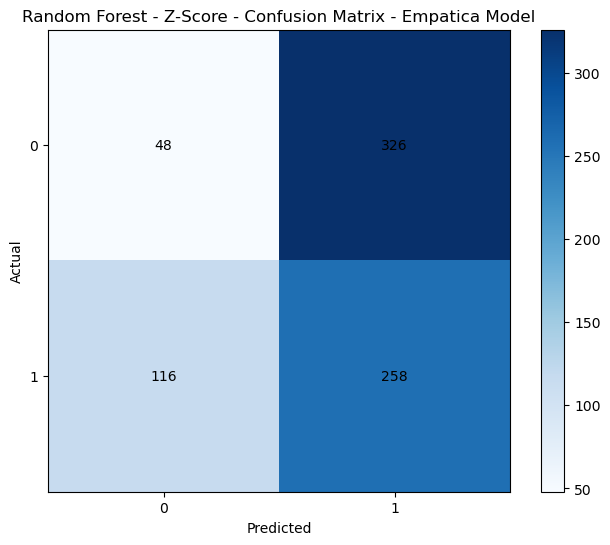

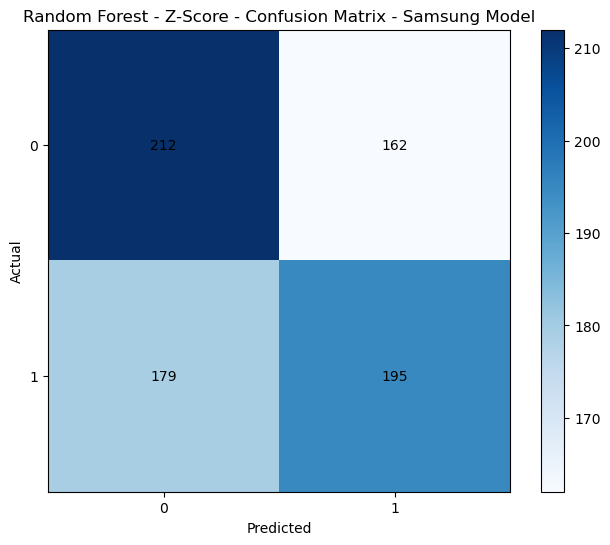

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/z-score/a_training.csv"
testing_file_path = "./data/6-data-split/z-score/b_testing.csv"
validation_file_path = "./data/6-data-split/z-score/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Combine training and validation data
X_train_empatica = pd.concat(
    [X_train_empatica, validation_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]]
)
y_train_empatica = pd.concat([y_train_empatica, validation_df["CL"]])

X_train_samsung = pd.concat([X_train_samsung, validation_df[["samsung_bvp"]]])
y_train_samsung = pd.concat([y_train_samsung, validation_df["CL"]])

# Define Random Forest models
model_empatica_rf = RandomForestClassifier(random_state=42)
model_samsung_rf = RandomForestClassifier(random_state=42)

# Train the models
model_empatica_rf.fit(X_train_empatica, y_train_empatica)
model_samsung_rf.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica_rf = model_empatica_rf.predict(X_test_empatica)
y_pred_samsung_rf = model_samsung_rf.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_rf = accuracy_score(y_test_empatica, y_pred_empatica_rf)
accuracy_samsung_rf = accuracy_score(y_test_samsung, y_pred_samsung_rf)

print("Empatica Model (RF) Accuracy:", accuracy_empatica_rf)
print("Samsung Model (RF) Accuracy:", accuracy_samsung_rf)

# Classification report
print(
    "\nClassification Report (Empatica Model RF):\n",
    classification_report(y_test_empatica, y_pred_empatica_rf),
)
print(
    "\nClassification Report (Samsung Model RF):\n",
    classification_report(y_test_samsung, y_pred_samsung_rf),
)

# Confusion matrix
conf_mat_empatica_rf = confusion_matrix(y_test_empatica, y_pred_empatica_rf)
conf_mat_samsung_rf = confusion_matrix(y_test_samsung, y_pred_samsung_rf)

print("\nConfusion Matrix (Empatica Model RF):\n", conf_mat_empatica_rf)
print("\nConfusion Matrix (Samsung Model RF):\n", conf_mat_samsung_rf)

# Visualize the confusion matrix for Empatica Model (RF)
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica_rf, cmap="Blues")
plt.title("Random Forest - Z-Score - Confusion Matrix - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica_rf.shape[0]):
    for j in range(conf_mat_empatica_rf.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_empatica_rf[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

# Visualize the confusion matrix for Samsung Model (RF)
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung_rf, cmap="Blues")
plt.title("Random Forest - Z-Score - Confusion Matrix - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung_rf.shape[0]):
    for j in range(conf_mat_samsung_rf.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_samsung_rf[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

Empatica Model (RF) Accuracy: 0.4090909090909091
Samsung Model (RF) Accuracy: 0.5441176470588235

Classification Report (Empatica Model RF):
               precision    recall  f1-score   support

           0       0.29      0.13      0.18       374
           1       0.44      0.69      0.54       374

    accuracy                           0.41       748
   macro avg       0.37      0.41      0.36       748
weighted avg       0.37      0.41      0.36       748


Classification Report (Samsung Model RF):
               precision    recall  f1-score   support

           0       0.54      0.57      0.55       374
           1       0.55      0.52      0.53       374

    accuracy                           0.54       748
   macro avg       0.54      0.54      0.54       748
weighted avg       0.54      0.54      0.54       748


Confusion Matrix (Empatica Model RF):
 [[ 48 326]
 [116 258]]

Confusion Matrix (Samsung Model RF):
 [[212 162]
 [179 195]]


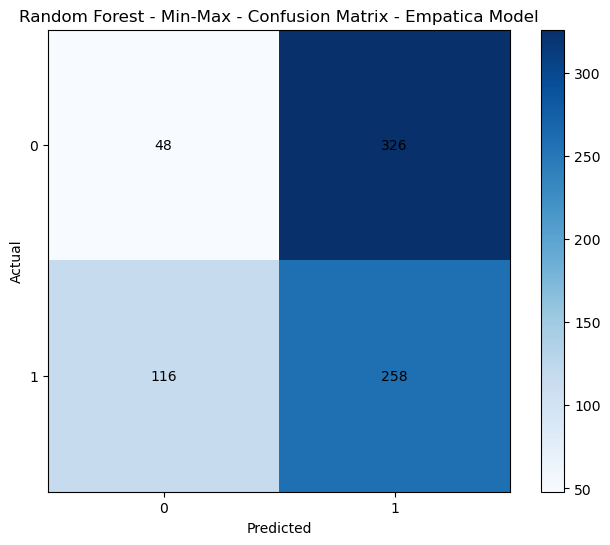

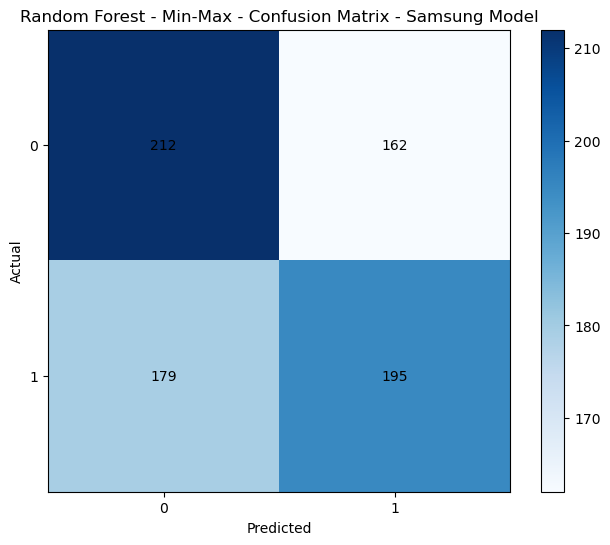

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/min-max/a_training.csv"
testing_file_path = "./data/6-data-split/min-max/b_testing.csv"
validation_file_path = "./data/6-data-split/min-max/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Combine training and validation data
X_train_empatica = pd.concat(
    [X_train_empatica, validation_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]]
)
y_train_empatica = pd.concat([y_train_empatica, validation_df["CL"]])

X_train_samsung = pd.concat([X_train_samsung, validation_df[["samsung_bvp"]]])
y_train_samsung = pd.concat([y_train_samsung, validation_df["CL"]])

# Define Random Forest models
model_empatica_rf = RandomForestClassifier(random_state=42)
model_samsung_rf = RandomForestClassifier(random_state=42)

# Train the models
model_empatica_rf.fit(X_train_empatica, y_train_empatica)
model_samsung_rf.fit(X_train_samsung, y_train_samsung)

# Predictions
y_pred_empatica_rf = model_empatica_rf.predict(X_test_empatica)
y_pred_samsung_rf = model_samsung_rf.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_rf = accuracy_score(y_test_empatica, y_pred_empatica_rf)
accuracy_samsung_rf = accuracy_score(y_test_samsung, y_pred_samsung_rf)

print("Empatica Model (RF) Accuracy:", accuracy_empatica_rf)
print("Samsung Model (RF) Accuracy:", accuracy_samsung_rf)

# Classification report
print(
    "\nClassification Report (Empatica Model RF):\n",
    classification_report(y_test_empatica, y_pred_empatica_rf),
)
print(
    "\nClassification Report (Samsung Model RF):\n",
    classification_report(y_test_samsung, y_pred_samsung_rf),
)

# Confusion matrix
conf_mat_empatica_rf = confusion_matrix(y_test_empatica, y_pred_empatica_rf)
conf_mat_samsung_rf = confusion_matrix(y_test_samsung, y_pred_samsung_rf)

print("\nConfusion Matrix (Empatica Model RF):\n", conf_mat_empatica_rf)
print("\nConfusion Matrix (Samsung Model RF):\n", conf_mat_samsung_rf)

# Visualize the confusion matrix for Empatica Model (RF)
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica_rf, cmap="Blues")
plt.title("Random Forest - Min-Max - Confusion Matrix - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica_rf.shape[0]):
    for j in range(conf_mat_empatica_rf.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_empatica_rf[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

# Visualize the confusion matrix for Samsung Model (RF)
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung_rf, cmap="Blues")
plt.title("Random Forest - Min-Max - Confusion Matrix - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung_rf.shape[0]):
    for j in range(conf_mat_samsung_rf.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_samsung_rf[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

Empatica Model (RF) Accuracy: 0.36363636363636365
Samsung Model (RF) Accuracy: 0.5828877005347594

Classification Report (Empatica Model RF):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       374
           1       0.42      0.73      0.53       374

    accuracy                           0.36       748
   macro avg       0.21      0.36      0.27       748
weighted avg       0.21      0.36      0.27       748


Classification Report (Samsung Model RF):
               precision    recall  f1-score   support

           0       0.57      0.65      0.61       374
           1       0.60      0.52      0.55       374

    accuracy                           0.58       748
   macro avg       0.58      0.58      0.58       748
weighted avg       0.58      0.58      0.58       748


Confusion Matrix (Empatica Model RF):
 [[  0 374]
 [102 272]]

Confusion Matrix (Samsung Model RF):
 [[242 132]
 [180 194]]


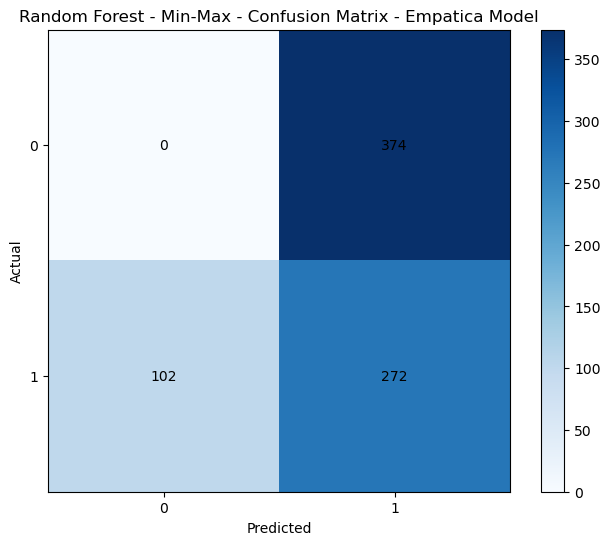

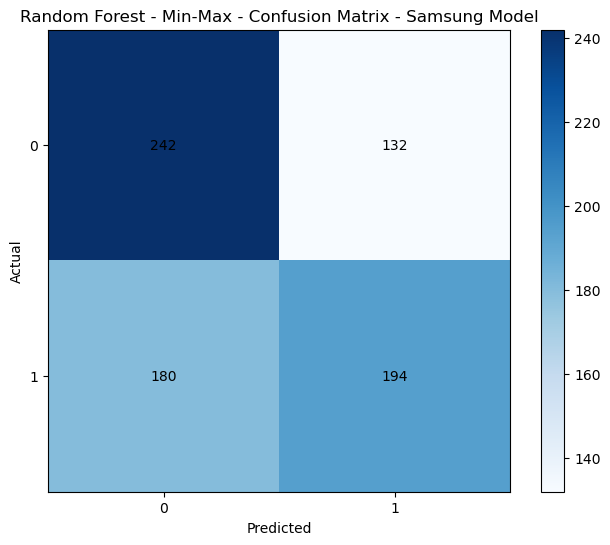

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Define file paths
training_file_path = "./data/6-data-split/min-max/a_training.csv"
testing_file_path = "./data/6-data-split/min-max/b_testing.csv"
validation_file_path = "./data/6-data-split/min-max/c_validation.csv"

# Load the dataset
training_df = pd.read_csv(training_file_path)
testing_df = pd.read_csv(testing_file_path)
validation_df = pd.read_csv(validation_file_path)

# Split the dataset into features (X) and target variable (y)
X_train_empatica = training_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_train_empatica = training_df["CL"]

X_train_samsung = training_df[["samsung_bvp"]]
y_train_samsung = training_df["CL"]

X_test_empatica = testing_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]
y_test_empatica = testing_df["CL"]

X_test_samsung = testing_df[["samsung_bvp"]]
y_test_samsung = testing_df["CL"]

# Combine training and validation data
X_train_empatica = pd.concat(
    [X_train_empatica, validation_df[["empatica_bvp", "empatica_eda", "empatica_temp"]]]
)
y_train_empatica = pd.concat([y_train_empatica, validation_df["CL"]])

X_train_samsung = pd.concat([X_train_samsung, validation_df[["samsung_bvp"]]])
y_train_samsung = pd.concat([y_train_samsung, validation_df["CL"]])

# Define Random Forest models
rf_classifier_empatica = RandomForestClassifier(random_state=42)
rf_classifier_samsung = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    "n_estimators": [100, 200, 300],  # Number of trees in the forest
    "max_depth": [None, 10, 20, 30],  # Maximum depth of the trees
    "min_samples_split": [
        2,
        5,
        10,
    ],  # Minimum number of samples required to split an internal node
    "min_samples_leaf": [
        1,
        2,
        4,
    ],  # Minimum number of samples required to be at a leaf node
}

# Perform grid search to find the best hyperparameters for Empatica
grid_search_empatica = GridSearchCV(
    estimator=rf_classifier_empatica, param_grid=param_grid, cv=5
)
grid_search_empatica.fit(X_train_empatica, y_train_empatica)

# Get the best hyperparameters for Empatica
best_params_empatica = grid_search_empatica.best_params_

# Train the Empatica Random Forest classifier with the best hyperparameters
best_rf_classifier_empatica = RandomForestClassifier(
    **best_params_empatica, random_state=42
)
best_rf_classifier_empatica.fit(X_train_empatica, y_train_empatica)

# Perform grid search to find the best hyperparameters for Samsung
grid_search_samsung = GridSearchCV(
    estimator=rf_classifier_samsung, param_grid=param_grid, cv=5
)
grid_search_samsung.fit(X_train_samsung, y_train_samsung)

# Get the best hyperparameters for Samsung
best_params_samsung = grid_search_samsung.best_params_

# Train the Samsung Random Forest classifier with the best hyperparameters
best_rf_classifier_samsung = RandomForestClassifier(
    **best_params_samsung, random_state=42
)
best_rf_classifier_samsung.fit(X_train_samsung, y_train_samsung)

# Make predictions for Empatica
y_pred_empatica_rf = best_rf_classifier_empatica.predict(X_test_empatica)

# Make predictions for Samsung
y_pred_samsung_rf = best_rf_classifier_samsung.predict(X_test_samsung)

# Evaluate the models
accuracy_empatica_rf = accuracy_score(y_test_empatica, y_pred_empatica_rf)
accuracy_samsung_rf = accuracy_score(y_test_samsung, y_pred_samsung_rf)

print("Empatica Model (RF) Accuracy:", accuracy_empatica_rf)
print("Samsung Model (RF) Accuracy:", accuracy_samsung_rf)

# Classification report
print(
    "\nClassification Report (Empatica Model RF):\n",
    classification_report(y_test_empatica, y_pred_empatica_rf),
)
print(
    "\nClassification Report (Samsung Model RF):\n",
    classification_report(y_test_samsung, y_pred_samsung_rf),
)

# Confusion matrix
conf_mat_empatica_rf = confusion_matrix(y_test_empatica, y_pred_empatica_rf)
conf_mat_samsung_rf = confusion_matrix(y_test_samsung, y_pred_samsung_rf)

print("\nConfusion Matrix (Empatica Model RF):\n", conf_mat_empatica_rf)
print("\nConfusion Matrix (Samsung Model RF):\n", conf_mat_samsung_rf)

# Visualize the confusion matrix for Empatica Model (RF)
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_empatica_rf, cmap="Blues")
plt.title("Random Forest - Min-Max - Confusion Matrix - Empatica Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_empatica_rf.shape[0]):
    for j in range(conf_mat_empatica_rf.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_empatica_rf[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()

# Visualize the confusion matrix for Samsung Model (RF)
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_samsung_rf, cmap="Blues")
plt.title("Random Forest - Min-Max - Confusion Matrix - Samsung Model")
plt.colorbar()
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(conf_mat_samsung_rf.shape[0]):
    for j in range(conf_mat_samsung_rf.shape[1]):
        plt.text(
            j,
            i,
            str(conf_mat_samsung_rf[i, j]),
            ha="center",
            va="center",
            color="black",
        )
plt.show()